In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 39s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train[16].shape

(32, 32, 3)

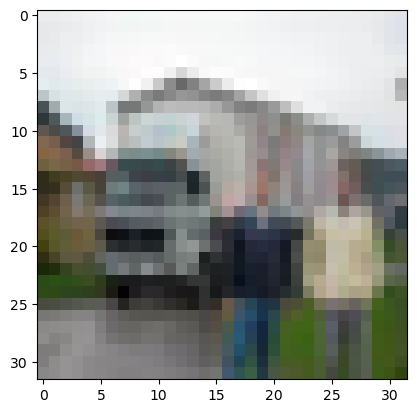

In [12]:
plt.imshow(x_train[16])

In [13]:
x_train[0].max()

255

In [14]:
x_train= x_train/255

In [15]:
x_test= x_test/255

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train= to_categorical(y_train,10)

In [20]:
y_cat_test= to_categorical(y_test,10)

In [21]:
y_train[0]

array([6], dtype=uint8)

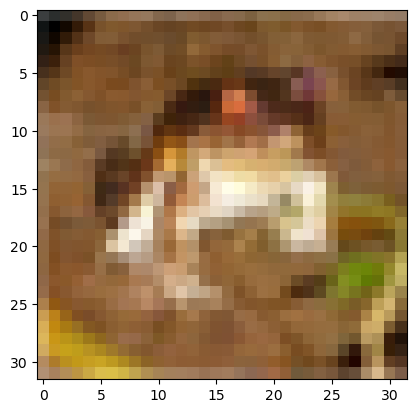

In [24]:
plt.imshow(x_train[0])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [27]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop= EarlyStopping(monitor='val_loss',patience=2)

In [31]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 49s 30ms/step - loss: 1.5254 - accuracy: 0.4481 - val_loss: 1.2661 - val_accuracy: 0.5459
Epoch 2/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1837 - accuracy: 0.5814 - val_loss: 1.1331 - val_accuracy: 0.6002
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0403 - accuracy: 0.6398 - val_loss: 1.0173 - val_accuracy: 0.6411
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9406 - accuracy: 0.6721 - val_loss: 0.9846 - val_accuracy: 0.6543
Epoch 5/15
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8522 - accuracy: 0.7038 - val_loss: 0.9898 - val_accuracy: 0.6536
Epoch 6/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7812 - accuracy: 0.7282 - val_loss: 0.9601 - val_accuracy: 0.6707
Epoch 7/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7148 - accuracy: 0.7509 - val_loss: 0.9752 -

In [32]:
metrics= pd.DataFrame(model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.525357,0.44814,1.266056,0.5459
1,1.183651,0.58144,1.133088,0.6002
2,1.040307,0.63982,1.017324,0.6411
3,0.940560,0.67214,0.984645,0.6543
4,0.852206,0.70376,0.989762,0.6536
5,0.781235,0.72822,0.960094,0.6707
6,0.714833,0.75090,0.975187,0.6682
7,0.656141,0.77036,0.951812,0.6787
8,0.597375,0.78960,0.985564,0.6797
9,0.541910,0.80976,0.992291,0.6846


<AxesSubplot:>

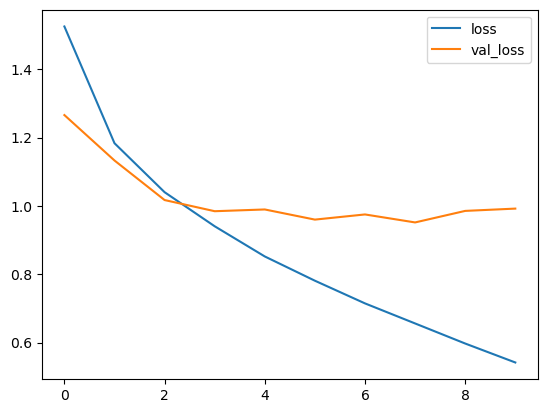

In [34]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

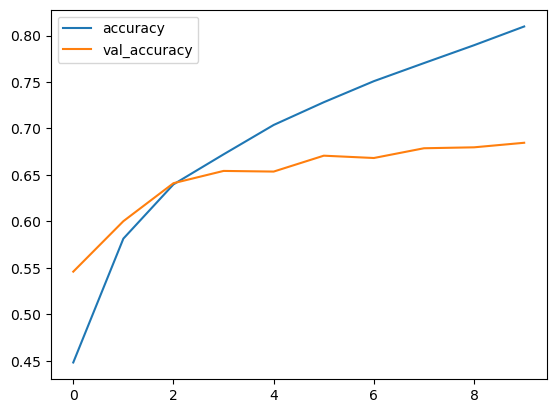

In [36]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9922912120819092, 0.6845999956130981]

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 2s 6ms/step


In [67]:
my_image= x_test[0]

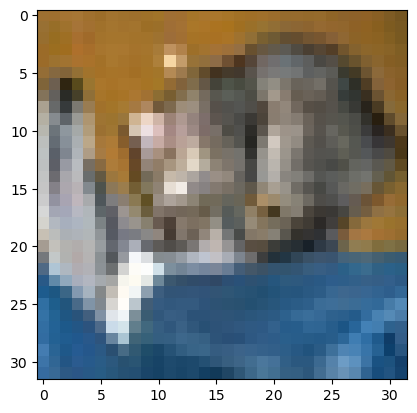

In [68]:
plt.imshow(my_image)

In [70]:
y_test[0]

array([3], dtype=uint8)

In [71]:
(model.predict(my_image.reshape(1,32,32,3)) > 0.5).astype("int64")

1/1 [==============================] - 0s 39ms/step


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)